In [1]:
import pandas as pd
from cleaning import create_demand
import pyomo.environ as pyo
import pyomo
import random
import matplotlib.pyplot as plt
random.seed(874631)

# Data import

In [2]:
nodes = pd.read_pickle("../../data/original/nodes.pkl")
channels = pd.read_pickle("../../data/original/channels.pkl")
additional_features = pd.read_csv("../../data/original/additional_features.csv")

additional_features.set_index("pubkey", inplace=True)

In [3]:
channels["base_fee"] = channels.loc[:, "base_fee"].apply(lambda x: random.uniform(0,100)) # if x==0 else x)
channels["rate_fee"] = channels.loc[:, "rate_fee"].apply(lambda x: random.uniform(0.001,0.1)) # if x==0 else x)

In [4]:
additional_features.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,alias,color_hex,open_channels,capacity,min_channel_size,address_1,...,lnp_updated_at,lnp_rank,lnp_rank_name,prime,pro,lnp_positive_ratings_received,lnp_negative_ratings_received,lnp_positive_ratings_given,lnp_negative_ratings_given,lnp_badges
pubkey,,,,,,,,,,,,,,,,,,,,,
0200000000727d3b67513c916f16975e3bf8f3304cf3fcf0ed855e2ae41888f461,0,0.0,0.0,0,lightningspore.com,#ff5000,38.0,128909413.0,NaN,35.84.234.241:9735,...,2025-03-01T22:52:15.596Z,8.0,Gold,False,False,NaN,NaN,NaN,NaN,[]
0200000000a3eff613189ca6c4070c89206ad658e286751eca1f29262948247a5f,1,1.0,1.0,1,pay.lnrouter.app,#f8fbff,4.0,23780264.0,NaN,159.69.16.168:9735,...,2025-03-01T17:34:36.856Z,6.0,Tungsten,False,False,NaN,NaN,NaN,NaN,[]
020003b9499a97c8dfbbab6b196319db37ba9c37bccb60477f3c867175f417988e,2,2.0,2.0,2,BJCR_BTCPayServer,#3399ff,40.0,198734206.0,0.0,vr47stl576kawzuogikujvopddkztcsjigvu2jgnkcztl5...,...,2025-03-01T15:04:43.076Z,7.0,Silver,True,False,16.0,0.0,13.0,3.0,"[{'name': 'Opener', 'description': 'Opened a C..."
0200081eaa41b5661d3b512f5aae9d6abfb11ba1497a354e9217d9a18fbaa1e76b,3,3.0,3.0,3,0200081eaa41b5661d3b,#3399ff,3.0,300000.0,NaN,lm63zodngkzqbol6lgadijh5p5xm6ltbekfxlbofvmnbkv...,...,2025-03-01T14:19:59.503Z,6.0,Tungsten,False,False,NaN,NaN,NaN,NaN,[]
020016201d389a44840f1f33be29288952f67c8ef6b3f98726fda180b4185ca6e2,4,4.0,4.0,4,AlasPoorYorick,#604bee,1.0,1000000.0,0.0,7vuykfnmgkarlk4xjew4ea6lj7qwbbggbox4b72abupu7s...,...,2024-08-02T03:24:59.748Z,0.0,NaN,True,False,17.0,0.0,18.0,0.0,"[{'name': 'Opener', 'description': 'Opened a C..."


(array([1102., 1073., 1300., 1178.,  857.,  586.,  150.,  594., 1198.,
         550.,  834., 1084.,  972.,  252.,  248.]),
 array([1.00000000e+00, 1.15933333e+03, 2.31766667e+03, 3.47600000e+03,
        4.63433333e+03, 5.79266667e+03, 6.95100000e+03, 8.10933333e+03,
        9.26766667e+03, 1.04260000e+04, 1.15843333e+04, 1.27426667e+04,
        1.39010000e+04, 1.50593333e+04, 1.62176667e+04, 1.73760000e+04]),
 <BarContainer object of 15 artists>)

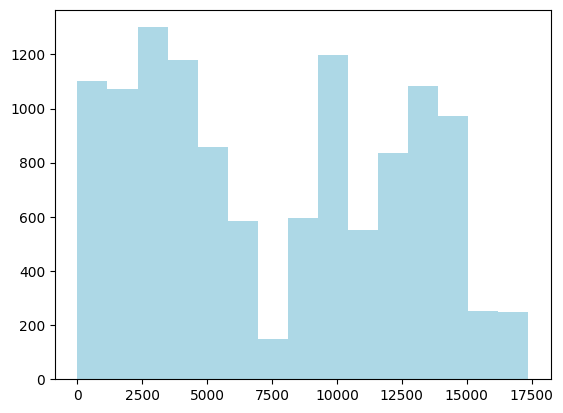

In [5]:
plt.hist(additional_features.loc[:, "weighted_betweenness_rank"], color='lightblue', ec='black', bins=15)

(array([1094., 1065., 1116., 1064., 1185.,  563.,  159.,  594., 1198.,
         550.,  834., 1084.,  972.,  252.,  248.]),
 array([1.00000000e+00, 1.15933333e+03, 2.31766667e+03, 3.47600000e+03,
        4.63433333e+03, 5.79266667e+03, 6.95100000e+03, 8.10933333e+03,
        9.26766667e+03, 1.04260000e+04, 1.15843333e+04, 1.27426667e+04,
        1.39010000e+04, 1.50593333e+04, 1.62176667e+04, 1.73760000e+04]),
 <BarContainer object of 15 artists>)

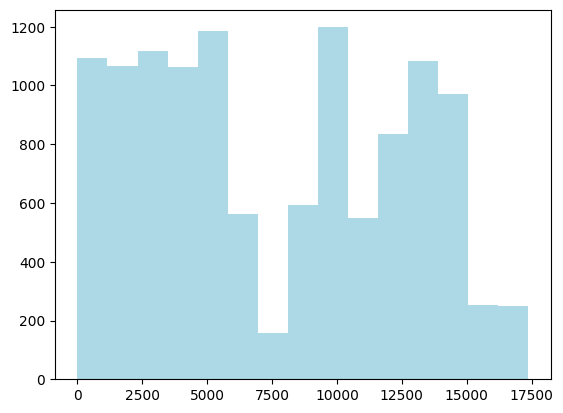

In [6]:
plt.hist(additional_features.loc[:, "weighted_hopness_rank"], color='lightblue', ec='black', bins=15)

(array([1157., 1106., 1082., 1151., 1037.,  540.,  173.,  594., 1198.,
         550.,  834., 1084.,  972.,  252.,  248.]),
 array([1.00000000e+00, 1.15933333e+03, 2.31766667e+03, 3.47600000e+03,
        4.63433333e+03, 5.79266667e+03, 6.95100000e+03, 8.10933333e+03,
        9.26766667e+03, 1.04260000e+04, 1.15843333e+04, 1.27426667e+04,
        1.39010000e+04, 1.50593333e+04, 1.62176667e+04, 1.73760000e+04]),
 <BarContainer object of 15 artists>)

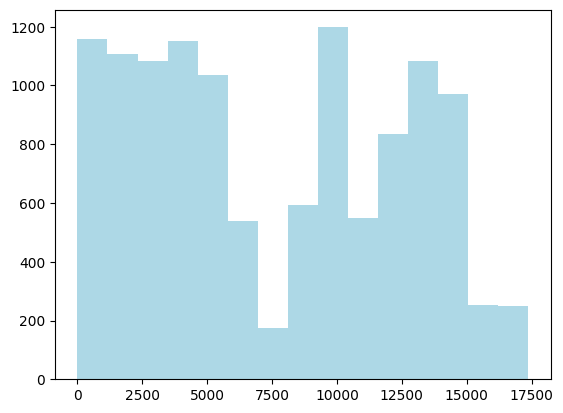

In [7]:
plt.hist(additional_features.loc[:, "weighted_hubness_rank"], color='lightblue', ec='black', bins=15)

## Modeling

In [8]:
pyomo.common.timing.report_timing()

In [9]:
# Multiplication to set the same base unit for all computations
channels["capacity"] = channels["capacity"] * 1000000
channels["base_fee"] = channels["base_fee"] * 1000000

In [10]:
model = pyo.ConcreteModel(name="Min cost flow problem")
model.NODES = pyo.Set(initialize=nodes.index)
model.CHANNELS = pyo.Set(initialize=[(channels.loc[i, "node1_pub"], channels.loc[i, "node2_pub"]) for i in channels.index])

           0 seconds to construct Block ConcreteModel; 1 index total
        0.04 seconds to construct Set NODES; 1 index total
        0.25 seconds to construct Set CHANNELS; 1 index total


In [11]:
transaction_amount = 1000000
#nodes = create_demand(nodes, transaction_amount,
#                      source="02b4098c3116124c0c4105295d3d2e65927d46e98e248d84cb6119da57e4ae31e3",destination="0202f00d5f5c91a3c79113851b162c2b75f2cbd9fb2378fb4a4ce92d5ba1e63e08")
nodes = create_demand(nodes, transaction_amount, source="02b4098c3116124c0c4105295d3d2e65927d46e98e248d84cb6119da57e4ae31e3")


Transaction of 1000000 sats.
Sender: VeniceForever
Receiver: 02d41ea2ed132ffcaaf9.


In [14]:
model.x = pyo.Var(model.CHANNELS, domain=pyo.NonNegativeIntegers, bounds=(0,1))
model.a = pyo.Var(model.CHANNELS, domain=pyo.NonNegativeReals, bounds=(0, max(nodes["demand"])))
model.i = pyo.Var(model.CHANNELS, domain=pyo.Integers)
model.active_betweenness = pyo.Var(model.CHANNELS, within=pyo.Binary)
model.active_hubness = pyo.Var(model.CHANNELS, within=pyo.Binary)
model.active_hopness = pyo.Var(model.CHANNELS, within=pyo.Binary)

'pyomo.core.base.var.IndexedVar'>) on block Min cost flow problem with a new
Component (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
        0.17 seconds to construct Var x; 89898 indices total
'pyomo.core.base.var.IndexedVar'>) on block Min cost flow problem with a new
Component (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
        0.18 seconds to construct Var a; 89898 indices total
'pyomo.core.base.var.IndexedVar'>) on block Min cost flow problem with a new
Component (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
        0.17 seconds to construct Var i; 89898 indices total
        0.08 seconds to construct 

In [15]:
channels.reset_index(inplace=True)
channels.set_index(["node1_pub", "node2_pub"], inplace=True)
channels.sort_index(inplace=True)

### Objective function

$$
min \sum_{} ^{} amount_i \times feerate_{i} + x_{i} \times basefee_{i}
$$

In [16]:
#def objective_function(model: pyo.ConcreteModel):
#    return sum(model.a[i] * channels.loc[i, "rate_fee"] for i in model.CHANNELS) + sum(model.x[i] * channels.loc[i, "base_fee"] for i in model.CHANNELS)

def objective_function(model: pyo.ConcreteModel):
    return sum(model.a[i] * channels.loc[i, "rate_fee"] + model.x[i] * channels.loc[i, "base_fee"] for i in model.CHANNELS)

model.totalCost = pyo.Objective(rule=objective_function(model), sense=pyo.minimize)

           0 seconds to construct Objective totalCost; 1 index total


### Constraints


#### Capacity constraint

$$amount_{i,j} \le capacity_{i,j} \times x_{i,j} \text{ } \forall (i,j) \in E$$

In [17]:
def capacity_constraint(model: pyo.ConcreteModel, a, b):
    return model.a[(a, b)] <= channels.loc[(a, b), "capacity"] * model.x[(a, b)]

model.CapacityConstraint = pyo.Constraint(model.CHANNELS, rule=capacity_constraint, name="Capacity constraint")

        4.95 seconds to construct Constraint CapacityConstraint; 89898 indices total


#### Flow balance constraint

$$\sum_{(s,i) \in E} amount_{s,i} - \sum_{(i,d) \in E} amount_{i,d} = b_i \text{ } \forall i \in V$$

where $s$ is the source node, $d$ is the destination node, $i$ is every intermediary node


In [18]:
channels.reset_index(inplace=True)
channels.set_index("channel_id", inplace=True)

def flow_balance_constraint(model: pyo.ConcreteModel, n: str):
    InFlow = sum(model.a[(channels.loc[a, "node1_pub"], channels.loc[a, "node2_pub"])] for a in nodes.loc[n, 'incoming_channels'])
    OutFlow = sum(model.a[(channels.loc[a, "node1_pub"], channels.loc[a, "node2_pub"])] for a in nodes.loc[n, 'outgoing_channels'])
    return  OutFlow + nodes.loc[n, "demand"] == InFlow

model.FlowBalanceConstraint = pyo.Constraint(model.NODES, rule=flow_balance_constraint, name="Flow balance constrain")

channels.reset_index(inplace=True)
channels.set_index(["node1_pub", "node2_pub"], inplace=True)
channels.sort_index(inplace=True) 

        3.37 seconds to construct Constraint FlowBalanceConstraint; 11984 indices total


### Position improvement constraint

We prefer routes that lead faster to central hubs in the network, because they tend to be on shortest paths between the majority of nodes.
We assign an amount of improvement to each channel that is the delta between the average of 3 metric scores of the two peers of the channel.
The improvement can be maximum the value of the delta.
The amount of improvement at every point in the graph has to be negative, meaning that every step shall improve the positioning of the node for the metrics. 
If the node is a node in a set of highly connected nodes, then the net improvement for that node can be even positive, meaning that the delta incoming is smaller than the delta outgoing.

$$improvement_{i,j} \le BetweennessDelta_{i,j} \times x_{i,j} \text{ } \forall (i,j) \in E$$

$$improvement_{i,j} \le HubnessDelta{i,j} \times x_{i,j} \text{ } \forall (i,j) \in E$$

$$improvement_{i,j} \le HopnessDelta_{i,j} \times x_{i,j} \text{ } \forall (i,j) \in E$$



In [20]:
def improvement_betweenness_constraint(model, i, j):
    return model.i[i, j] <= (additional_features.loc[j, "weighted_betweenness_rank"] - additional_features.loc[i, "weighted_betweenness_rank"]) * model.x[i, j] + (1 - model.active_betweenness[i, j]) * 1e6

model.improvement_betweenness_constraint = pyo.Constraint(model.CHANNELS, rule=improvement_betweenness_constraint)

def improvement_hubness_constraint(model, i, j):
    return model.i[i, j] <= (additional_features.loc[j, "weighted_betweenness_rank"] - additional_features.loc[i, "weighted_betweenness_rank"]) * model.x[i, j] + (1 - model.active_hubness[i, j]) * 1e6

model.improvement_hubness_constraint = pyo.Constraint(model.E, rule=improvement_hubness_constraint)

def improvement_hopness_constraint(model, i, j):
    return model.i[i, j] <= (additional_features.loc[j, "weighted_betweenness_rank"] - additional_features.loc[i, "weighted_betweenness_rank"]) * model.x[i, j] + (1 - model.active_hopness[i, j]) * 1e6

model.improvement_hopness_constraint = pyo.Constraint(model.E, rule=improvement_hopness_constraint)

# At least one of the active variables is 1

def or_constraint(model, i, j):
    return model.active_betweenness[i, j] + model.active_hubness[i, j] + model.active_hopness[i, j] >= 1

model.or_condition_constraint = pyo.Constraint(model.E, rule=or_constraint)

ERROR: Rule failed when generating expression for Constraint
improvement_betweenness_constraint with index
('0207fded7f81647771ac646e49e9a029c956e8de911fa6b19c1055ab6b2ba350b2',
'025d28dc4c4f5ce4194c31c3109129cd741fafc1ff2f6ea53f97de2f58877b2295'):
KeyError: '0207fded7f81647771ac646e49e9a029c956e8de911fa6b19c1055ab6b2ba350b2'
        0.53 seconds to construct Constraint improvement_betweenness_constraint; 89898 indices total
ERROR: Constructing component 'improvement_betweenness_constraint' from
data=None failed:
        KeyError:
        '0207fded7f81647771ac646e49e9a029c956e8de911fa6b19c1055ab6b2ba350b2'


KeyError: '0207fded7f81647771ac646e49e9a029c956e8de911fa6b19c1055ab6b2ba350b2'

## Solving the model

In [ ]:
#from pyomo.common.tempfiles import TempfileManager
#TempfileManager.tempdir = "/home/filippo/repositories/LN-pathfinding"

In [ ]:
opt = pyo.SolverFactory('cbc')
#opt = pyo.SolverFactory('cplex_direct')
results = opt.solve(model, tee=True, keepfiles=True)

if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    print('\nOptimal solution found')
elif results.solver.termination_condition == pyo.TerminationCondition.feasible:
    print('\nFeasible but not proven optimal solution found')
elif results.solver.termination_condition == pyo.TerminationCondition.infeasible:
    raise Exception("The model is infeasible")
else:
    print('\nSolver Status: ',  results.solver.status)
    raise Exception(results.solver.status)

print('\nObject function value = ', model.Objective())


In [ ]:
#from pyomo.opt import SolverStatus, TerminationCondition

print("Solver Status: ",  results.solver[0]["System time"])


In [ ]:
from decimal import Decimal
pd.set_option('display.max_colwidth', 10000000000000000000000000000000000000000000000000000)
DF_channels = pd.DataFrame()
c = 0
for index, value in model.a.extract_values().items():
    if value > 0.1:
        DF_channels.loc[c, "source"] = index[0]
        DF_channels.loc[c, "destination"] = index[1]
        try:
            DF_channels.loc[c, "source-alias"] = nodes.loc[index[0], "alias"]
        except KeyError:
            print("Source alias not found in nodes database: placeholder inserted")
            DF_channels.loc[c, "source-alias"] = "source-alias"
            pass
        try:
            DF_channels.loc[c, "destination-alias"] = nodes.loc[index[1], "alias"]
        except KeyError:
            print("Destination alias not found in nodes database: placeholder inserted")
            DF_channels.loc[c, "destination-alias"] = "destination-alias"
            pass
        DF_channels.loc[c, "capacity"] = Decimal(channels.loc[index, "capacity"]/1000000)
        DF_channels.loc[c, "amount"] = Decimal(value/1000000)
        DF_channels.loc[c, "base_fee"] = Decimal(channels.loc[(index[0], index[1]), "base_fee"]/1000000)
        DF_channels.loc[c, "rate_fee"] = channels.loc[(index[0], index[1]), "rate_fee"]
        #DF_channels.loc[c, "used_fl"] = channels.loc[]
        c += 1

DF_channels_pos = DF_channels[DF_channels["amount"]!=0]

In [ ]:
DF_channels[DF_channels["amount"]> DF_channels["capacity"]]

In [ ]:
DF_fixed = pd.DataFrame()
c = 0
for index, value in model.x.extract_values().items():
    if value != 0:
        DF_fixed.loc[c, "source"] = index[0]
        DF_fixed.loc[c, "destination"] = index[1]
        DF_fixed.loc[c, "used"] = Decimal(value)
        c += 1

DF_fixed_pos = DF_fixed[DF_fixed["used"]!=0]
DF_fixed_pos

### All data about channels on path

In [ ]:
intersection = DF_fixed_pos.merge(DF_channels_pos, on=["source", "destination"], how="outer")
final = intersection[intersection["amount"]>0]
final

In [ ]:
%%capture --no-stdout
final["amount"] = final["amount"].astype(float)
final["rate_fee"] = final["rate_fee"].astype(float)
final["base_fee"] = final["base_fee"].astype(float)
total_transaction_cost = sum(final["amount"] * final["rate_fee"] + final["base_fee"])
perc_cost = (total_transaction_cost * 100) / transaction_amount
print(f"Transacting {transaction_amount} sats costs {total_transaction_cost} ({perc_cost}% of transaction amount)")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# edges list construction
edges_df = final[["source-alias", "destination-alias"]]

G = nx.from_pandas_edgelist(edges_df, "source-alias", "destination-alias", create_using=nx.DiGraph())

#plt.figure(figsize=(8, 6))
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
#plt.title("Graph from DataFrame of Edges")
#plt.show()


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
plt.title("Graph with Uniform Node Size")
plt.show()

In [ ]:
for i in nx.strongly_connected_components(G):
    print(i)

In [ ]:
final["amount"] = final["amount"].astype(float)
final["rate_fee"] = final["rate_fee"].astype(float)
final["base_fee"] = final["base_fee"].astype(float)
total_transaction_cost = sum(final["amount"] * final["rate_fee"] + final["base_fee"])
perc_cost = (total_transaction_cost * 100) / transaction_amount
print(f"Transacting {transaction_amount} sats costs {total_transaction_cost} ({perc_cost}% of transaction amount)")
print("Solver Status: ", results.solver[0]["System time"])

In [ ]:
#from collections import Counter
#results = [tuple(i) for i in DF_channels_pos[["source-alias", "destination-alias"]].to_numpy()]
#unwrap = [e for i in results for e in i]
#extremes = [j for j in unwrap if Counter(unwrap)[j] == 1]
#def return_source(l: list):
#    if l[0] in [i for i, j in results]:
#        return l[0]
#    else: 
#        return l[1]
#sequence = []        
#source = return_source(extremes)
#sequence.append(source)
#while len(sequence) <= len(results):
#    for i,j in results:
#        if i == sequence[-1]:
#            sequence.append(j)
#for i in sequence:
#    print("⬇️", i)